In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [5,5]
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [2]:
train_data=pd.read_csv('train.csv')
train_data.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [3]:
train_data.Severity.unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

In [4]:
c1=train_data[train_data.Severity=='Minor_Damage_And_Injuries']
c2=train_data[train_data.Severity=='Significant_Damage_And_Fatalities']
c3=train_data[train_data.Severity=='Significant_Damage_And_Serious_Injuries']
c4=train_data[train_data.Severity=='Highly_Fatal_And_Damaging']

In [5]:
train_data.shape

(10000, 12)

In [6]:
train_data.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [20]:
c1.skew()

Safety_Score               0.044889
Days_Since_Inspection     -0.185723
Total_Safety_Complaints    1.909363
Control_Metric            -0.188524
Turbulence_In_gforces      0.852924
Cabin_Temperature          0.852557
Accident_Type_Code         0.682633
Max_Elevation              0.011205
Violations                 0.121360
Adverse_Weather_Metric     1.702781
Accident_ID               -0.005119
dtype: float64

Text(0.5, 1.0, 'Distribution of Item_Visibility')

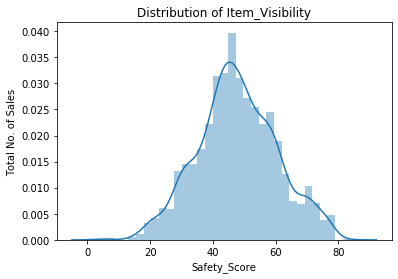

In [21]:
sns.distplot(c1['Safety_Score'])
plt.ylabel("Total No. of Sales")
plt.title("Distribution of Item_Visibility")

In [7]:
X = train_data.drop(['Severity','Accident_ID'],axis=1)
Y = train_data['Severity']

In [8]:
mmsc = MinMaxScaler()
mmsc_data = mmsc.fit_transform(X)
mmsc_data = pd.DataFrame(mmsc_data)
mmsc_data.columns = X.columns
X=mmsc_data
X.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,0.492237,0.590909,0.407407,0.712853,0.184489,0.144928,0.166667,0.480632,0.6,0.179292
1,0.624658,0.409091,0.500000,0.722881,0.387283,0.430391,0.166667,0.396953,0.4,0.148847
2,0.630594,0.545455,0.296296,0.663628,0.251927,0.180940,1.000000,0.605637,0.6,0.001289
3,0.480822,0.454545,0.166667,0.747037,0.271195,0.309618,0.333333,0.660824,0.2,0.089390
4,0.264840,0.545455,0.462963,0.479490,0.543834,0.106280,0.333333,0.546396,0.4,0.074656


In [9]:
Y.head()

0                  Minor_Damage_And_Injuries
1                  Minor_Damage_And_Injuries
2          Significant_Damage_And_Fatalities
3    Significant_Damage_And_Serious_Injuries
4          Significant_Damage_And_Fatalities
Name: Severity, dtype: object

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [11]:
gb = GradientBoostingClassifier(n_estimators=1000)
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

In [12]:
(f1_score(y_test,y_pred,average='weighted'))*100

96.30001964790542